In [ ]:
import numpy as np
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
#c
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names =['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)


In [ ]:
print(dataset.shape)

(150, 5)


In [ ]:
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Ver como esta compuesto nuestro dataset
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

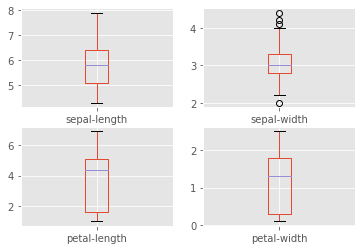

In [ ]:
#Revisando como estan nuestros datos
with plt.style.context('ggplot'):
  dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [ ]:
#Predeterminar que todas neustras graficas usen ese estilo
#siempre i guando usen matplotlib
plt.style.use('ggplot')

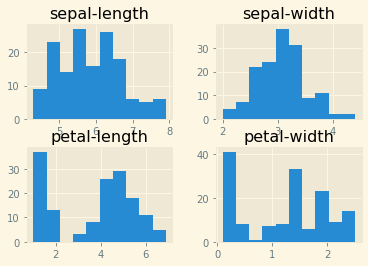

In [ ]:
with plt.style.context('Solarize_Light2'):
  dataset.hist()
plt.show()

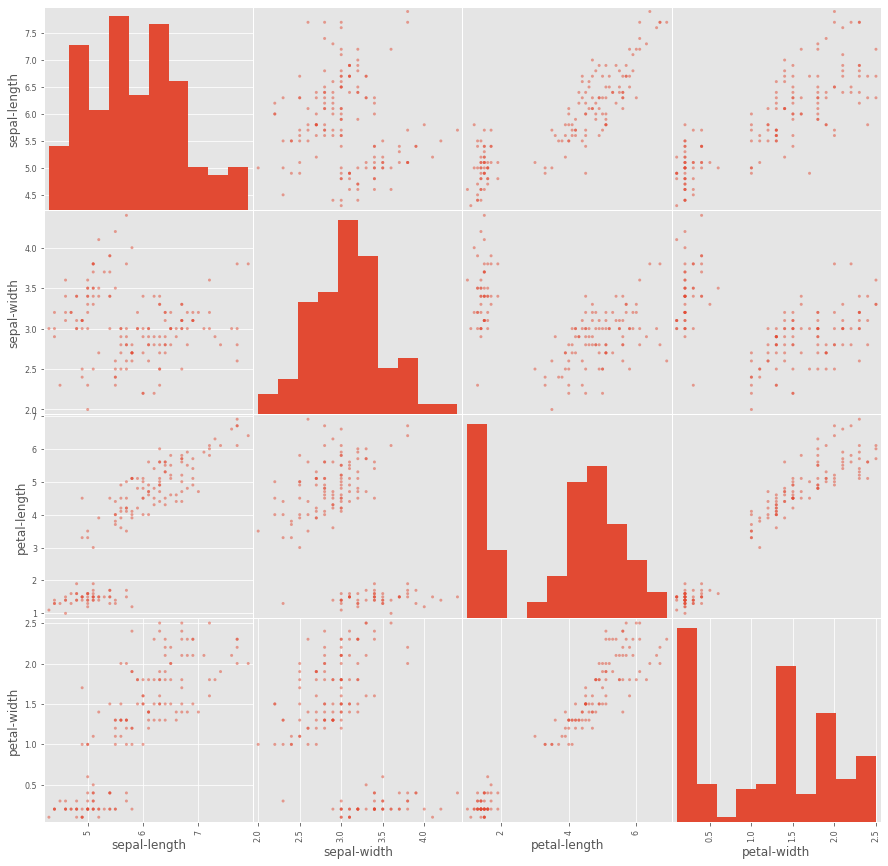

In [ ]:
#Scatter matrix para ver relación entre datos
scatter_matrix(dataset,figsize  = [15, 15])
plt.show()

In [ ]:
#Creando Datasets de validación
#Convierte todos los valores en arreglo
array = dataset.values
#en X asignamos los valores de cada tipo de planta, de cada atributo
X=array[:,0:4]
#en y es cada tipo de planta
y = array[:, 4]
#tamaño de nuestro dataset de validación
#por ende, nuestro dataset de entrenamiento será de .8
validation_size = 0.20
#le decimos cual será nuetro seed, es decir, como dividirá nuestros tests
#y train datasets. Si no es seteado, siempre serán diferentes.
#We set the random seed via the random_state argument to a fixed number 
#to ensure that each algorithm is evaluated on the same splits of the 
#training dataset.
seed = 2
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)


In [ ]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Hacemos nuestro arreglo de modelos que vamos a probar
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
#Creamos arrays vacíos para guardar
results =[]
names=[]

for name, model in models:
  #usamos K-Fold, básicamente n_splits nos dice cuandos grupos/conjuntos
  #usará para probar el modelo.
    kfold = model_selection.KFold(n_splits=2, random_state=seed,shuffle = False)
    #Guaramos resultados de los modelos
    #estimates the expected accuracy of your model on out-of-training data 
    #(pulled from the same underlying process as the training data, of course).
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}, {cv_results.mean()}, ({cv_results.std()})')

LR, 0.9583333333333333, (0.00833333333333336)
LDA, 0.9583333333333333, (0.024999999999999967)
KNN, 0.95, (0.016666666666666663)
CART, 0.9416666666666667, (0.025000000000000022)
NB, 0.9416666666666667, (0.008333333333333304)
SVM, 0.9583333333333333, (0.00833333333333336)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

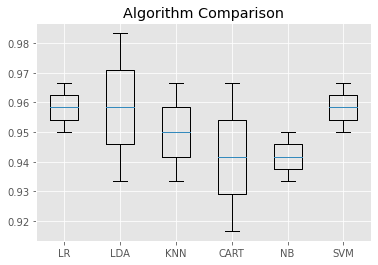

In [ ]:
#Revisamos precisión de nuestros algoritmos
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

#Haciendo una predicción

In [ ]:
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
#Accuracy del 93%
print(accuracy_score(y_test, predictions))

0.9666666666666667


In [ ]:
#La matriz de confusión provee visión de donde se hicieron los errores
#Each row in a confusion matrix represents an actual class,
#while each column represents a predicted class.
print(confusion_matrix(y_test, predictions))

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


In [ ]:
#Provee una explicación de cada calse por precisión, f-1 score y support
# muestran buenos resultados (dataset pequeño)
print(classification_report(y_test, predictions))
# Precision — What percent of your predictions were correct?
# Recall — What percent of the positive cases did you catch?
# F1 score — What percent of positive predictions were correct?
# Support - is the number of actual occurrences of the class in the specified dataset. 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

